In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#### Input (X): Sử dụng dữ liệu từ t-100 đến t để dự đoán giá trị Close tại bước t+1.
#### Target (y): Lấy giá trị Close tại thời điểm t+1 làm mục tiêu.     
#### LSTM sẽ sử dụng dữ liệu của 100 phút trước đó để dự đoán giá trị của phút tiếp theo.
#### Giá trị dự đoán là giá Close tại thời điểm t+1.

In [39]:
import data as data_file

X_train, X_test, y_train, y_test, scaler, data = data_file.main()

print("Train size:", X_train.shape, "Test size:", X_test.shape, "Data size:", data.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-12-12 00:00:00 -> 2024-12-12 23:59:59) (Yahoo error = "Data doesn\'t exist for startDate = 1733961600, endDate = 1734047999")')


Các cột trong dữ liệu: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Các cột trong dữ liệu: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
           Adj Close          Close           High            Low  \
count   74464.000000   74464.000000   74464.000000   74464.000000   
mean    86891.549044   86891.549044   86891.549652   86891.549044   
std     12055.954287   12055.954287   12055.954759   12055.954287   
min     65198.042969   65198.042969   65198.042969   65198.042969   
25%     72466.029297   72466.029297   72466.029297   72466.029297   
50%     96477.439955   96477.439955   96477.441262   96477.439955   
75%     96477.439955   96477.439955   96477.441262   96477.439955   
max    101352.539062  101352.539062  101352.539062  101352.539062   

                Open        Volume  
count   74464.000000  7.446400e+04  
mean    86891.549652  1.921623e+07  
std     12055.954759  1.082862e+08  
min     65198.042969  0.00

ValueError: not enough values to unpack (expected 6, got 5)

In [11]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1], X_train.shape[2])))

# Loại bỏ ngẫu nhiên 10% số nút trong quá trình huấn luyện để giảm overfitting.
model.add(Dropout(0.1))

# return_sequences=False nghĩa là tầng này chỉ giữ lại trạng thái cuối cùng của chuỗi (last hidden state).
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.1))

# Tầng đầu ra, dự đoán giá trị Close tại thời điểm t+1.
model.add(Dense(1))

# Compile mô hình
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

print(model.summary())

# Huấn luyện mô hình
# Epoch: Số lần toàn bộ dữ liệu huấn luyện được duyệt qua (50 lần trong mô hình này).
# Batch size: Số mẫu trong một lô dữ liệu được đưa vào mô hình cùng lúc (32 mẫu).
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,593 (463.25 KB)

 Trainable params: 118,593 (463.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 123s 82ms/step - loss: 0.1191 - mae: 0.1191 - val_loss: 0.0774 - val_mae: 0.0774
Epoch 2/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 114s 77ms/step - loss: 0.0919 - mae: 0.0919 - val_loss: 0.0899 - val_mae: 0.0899
Epoch 3/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 114s 77ms/step - loss: 0.0908 - mae: 0.0908 - val_loss: 0.0773 - val_mae: 0.0773
Epoch 4/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 116s 78ms/step - loss: 0.0903 - mae: 0.0903 - val_loss: 0.0822 - val_mae: 0.0822
Epoch 5/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 115s 77ms/step - loss: 0.0892 - mae: 0.0892 - val_loss: 0.0764 - val_mae: 0.0764
Epoch 6/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 109s 73ms/step - loss: 0.0880 - mae: 0.0880 - val_loss: 0.0791 - val_mae: 0.0791
Epoch 7/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - loss: 0.0877 - mae: 0.0877 - val_loss: 0.0756 - val_mae: 0.0756
Epoch 8/50
1485/1485 ━━━━━━━━━━━━━━━━━━━━ 110s 74ms/step - loss: 0.0877 - mae: 0.0877 - val_loss: 0.0847 - val_mae: 0.0847
Epoch 9/50


In [23]:
y_pred = model.predict(X_test)

print("Shape of predictions:", y_pred.shape)

465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step
Shape of predictions: (14849, 1)


In [37]:
# Chuyển đổi giá trị dự đoán và thực tế về thang đo gốc
y_pred_original = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1] - 1))), axis=1))[:, 0]

AttributeError: module 'data' has no attribute 'shape'

In [15]:
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, y_pred_original)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE Original: {mse_original}")
print(f"RMSE Original: {rmse_original}")
print(f"MAE Original: {mae_original}")

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE Original: 109642.34062259425
RMSE Original: 331.1228482339964
MAE Original: 240.552182215745
MSE: 0.00013776596469666804
RMSE: 0.011737374693544892
MAE: 0.008526899037848423


                     Thời gian  Thực tế (Actual)  Dự đoán (Predicted)  Hiệu (Actual - Predicted)
0    2024-11-13 11:50:00+00:00      68261.335938         68530.392076                -269.056139
1    2024-11-13 11:51:00+00:00      72501.015625         72381.753821                 119.261804
2    2024-11-13 11:53:00+00:00      67413.671875         67577.762056                -164.090181
3    2024-11-13 11:54:00+00:00      73598.343750         73188.466159                 409.877591
4    2024-11-13 11:56:00+00:00      70705.359375         70493.529534                 211.829841
...                        ...               ...                  ...                        ...
6796 2024-11-19 17:16:00+00:00      87526.867188         87056.433657                 470.433531
6797 2024-11-19 17:17:00+00:00      67420.039062         67534.697020                -114.657957
6798 2024-11-19 17:18:00+00:00      88148.085938         87710.354319                 437.731619
6799 2024-11-19 17:19:00+00:00

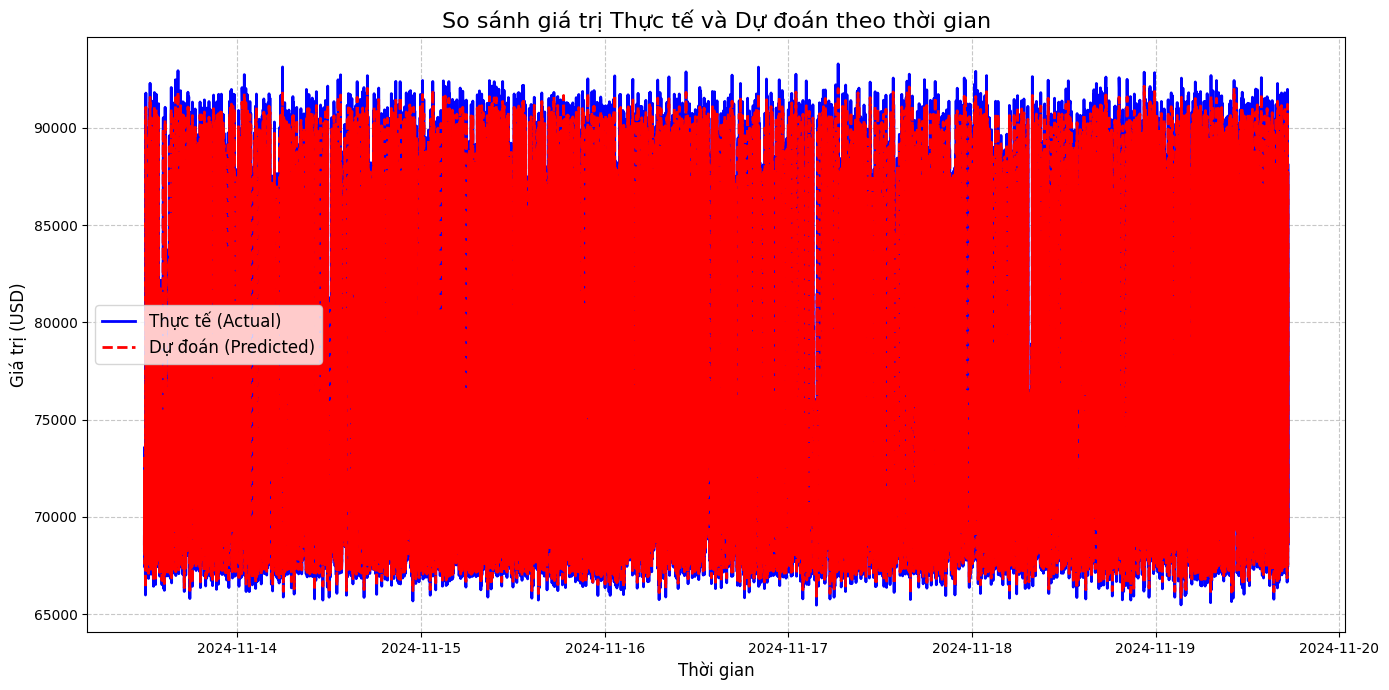

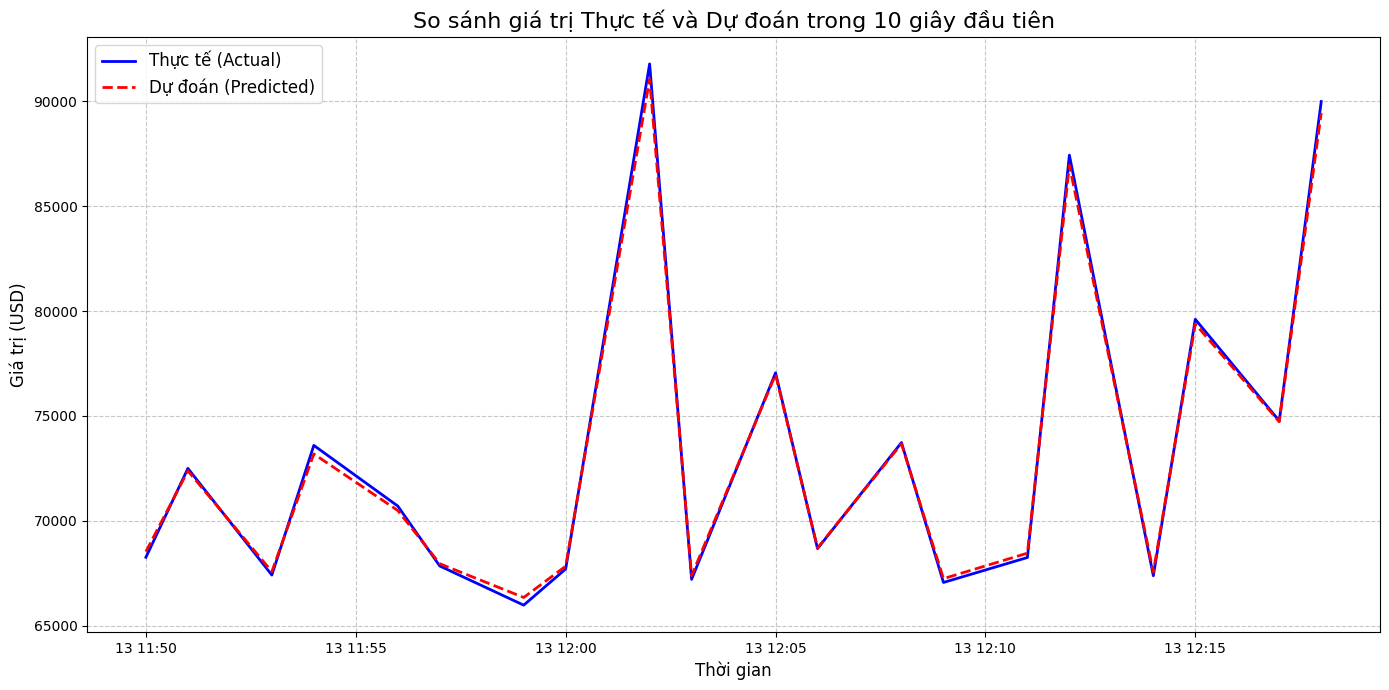

In [16]:
time_index_test = data.index[-len(y_test_original):]

results_df = pd.DataFrame({
    "Thời gian": time_index_test,
    "Thực tế (Actual)": y_test_original,
    "Dự đoán (Predicted)": y_pred_original,
    "Hiệu (Actual - Predicted)": y_test_original.flatten() - y_pred_original.flatten()
})

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(results_df)

plt.figure(figsize=(14, 7))
plt.plot(results_df["Thời gian"], results_df["Thực tế (Actual)"], label="Thực tế (Actual)", color='blue', linestyle='-', linewidth=2)
plt.plot(results_df["Thời gian"], results_df["Dự đoán (Predicted)"], label="Dự đoán (Predicted)", color='red', linestyle='--', linewidth=2)
plt.title("So sánh giá trị Thực tế và Dự đoán theo thời gian", fontsize=16)
plt.xlabel("Thời gian", fontsize=12)
plt.ylabel("Giá trị (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

results_df_10s = results_df.head(20)

plt.figure(figsize=(14, 7))
plt.plot(results_df_10s["Thời gian"], results_df_10s["Thực tế (Actual)"], label="Thực tế (Actual)", color='blue', linestyle='-', linewidth=2)
plt.plot(results_df_10s["Thời gian"], results_df_10s["Dự đoán (Predicted)"], label="Dự đoán (Predicted)", color='red', linestyle='--', linewidth=2)
plt.title("So sánh giá trị Thực tế và Dự đoán trong 10 giây đầu tiên", fontsize=16)
plt.xlabel("Thời gian", fontsize=12)
plt.ylabel("Giá trị (USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()